# Introduction

Notebook para avaliação de NAS-v3 com dataset NATS-Bench-201.

# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

In [3]:
from IPython.display import clear_output

import pandas as pd

In [4]:
import sys
if '../..' not in sys.path:
    sys.path.insert(0, '../..')
    
from validation_src.val_nas_executor import NASExecutor 

from src.base.experiment.training.optimizers import Optimizer

In [5]:
## restrict memory growth -------------------
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
try:
    gpu_0 = physical_devices[0]
    tf.config.experimental.set_memory_growth(gpu_0, True) 
    #tf.config.experimental.set_virtual_device_configuration(gpu_0, [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=6500)])
    print(' ==> Restrict GPU memory growth: True')
except: 
    raise Exception("Invalid device or cannot modify virtual devices once initialized.")
## restrict memory growth ------------------- 

 ==> Restrict GPU memory growth: True


# Run Set of Experiments

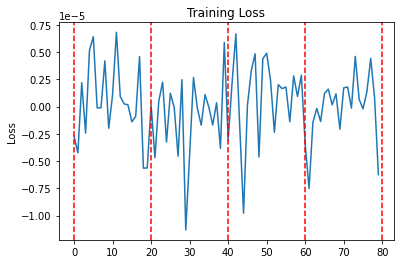

In [6]:
ss_indicators = ['tss'] #'sss'
algos_list = ['rl']  # ,'random','evolution'
datasets_list = ['ImageNet16-120','cifar10','cifar100']
mth_list = [100]
use_neptune = True

for ss in ss_indicators:
    for a in algos_list:
        for d in datasets_list:
            for mth in mth_list:
                executor = NASExecutor(a, d, mth, ss, use_neptune)
                sorted_results = executor.test_nas_algo(f'./results/{ss}/{a}_{str(mth)}h_{d}.csv')
                clear_output()               

# Tests NAS ALgorithms - Size Search Space (SSS)

## Cifar10

### Test with Random Algorithm

#### 1 hour

In [9]:
ss_indicator = 'tss'
algo_name = 'random'
dataset = 'cifar10'
max_train_hours = 1

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results = executor.test_nas_algo()
sorted_results.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

--------------------------------------------------------------------------------
Preparing NASExecutor:
  Algorithm: random
  Dataset: cifar10
  Max Training Hours: 1
  Search Space Indicator: tss
[2023-07-13 00:17:21] Try to use the default NATS-Bench (topology) path from fast_mode=True and path=None.
  .. Operations: ['none', 'skip_connect', 'nor_conv_1x1', 'nor_conv_3x3', 'avg_pool_3x3']
  .. Nodes: 4
Total time elapse: 0.8537559509277344 seconds.
--------------------------------------------------------------------------------
Total evaluated architectures: 31
Total time spent:              0 hours
Best model found:              |nor_conv_1x1~0|+|none~0|nor_conv_1x1~1|+|skip_connect~0|avg_pool_3x3~1|nor_conv_3x3~2|
Best model DNA:                DNA([2, 0, 2, 1, 4, 3])
Validation accuracy:           81.52000001464843
Test accuracy:                 92.39
--------------------------------------------------------------------------------


/home/guilherme/projects/doutorado/mteval-icao-reqs/submodules/icao_nets_training/project/training/nas_v3_validation/validation_src/val_nas_executor.py:238: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following monitoring options are disabled unless set to 'True' when initializing the run: 'capture_stdout', 'capture_stderr', and 'capture_hardware_metrics'.
  run = neptune.init_run(name='NAS with NATS and SSS',


https://app.neptune.ai/guilhermemg/nas-v3/e/NAS-103
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 468 operations to synchronize with Neptune. Do not kill this process.
All 468 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/guilhermemg/nas-v3/e/NAS-103/metadata
Search completed.
--------------------------------------------------------------------------------


,id,dna,cell_spec,val_acc,latency,time_cost,total_time,test_acc,test_loss,test_per_time,...,time_spent_in_hours,time_spent_in_secs,train_accuracy,train_loss,train_per_time,train_all_time,comment,algorithm,dataset,max_train_hours
8,9,"DNA([2, 0, 2, 1, 4, 3])",|nor_conv_1x1~0|+|none~0|nor_conv_1x1~1|+|skip...,81.520,0.017940,123.290374,907.051306,92.39,0.311796,1.295413,...,0,907.051,99.828,0.009845,20.008640,4001.728082,"In this dict, train-loss/accuracy/time is the ...",Random(\n seed = None\n),cifar10,1
7,8,"DNA([1, 2, 2, 1, 3, 4])",|skip_connect~0|+|nor_conv_1x1~0|nor_conv_1x1~...,81.096,0.017405,118.003582,783.760932,92.11,0.307300,1.274225,...,0,783.761,99.750,0.013166,19.136337,3827.267345,"In this dict, train-loss/accuracy/time is the ...",Random(\n seed = None\n),cifar10,1
12,13,"DNA([0, 0, 4, 3, 3, 4])",|none~0|+|none~0|avg_pool_3x3~1|+|nor_conv_3x3...,77.784,0.015255,122.709889,1329.294601,91.89,0.343630,1.411940,...,0,1329.295,99.750,0.012569,19.863340,3972.667980,"In this dict, train-loss/accuracy/time is the ...",Random(\n seed = None\n),cifar10,1
25,26,"DNA([2, 3, 4, 3, 0, 0])",|nor_conv_1x1~0|+|nor_conv_3x3~0|avg_pool_3x3~...,75.960,0.018286,129.946872,2914.553638,91.85,0.348913,1.410117,...,0,2914.554,99.772,0.011703,21.070263,4214.052677,"In this dict, train-loss/accuracy/time is the ...",Random(\n seed = None\n),cifar10,1
26,27,"DNA([3, 2, 1, 4, 2, 1])",|nor_conv_3x3~0|+|nor_conv_1x1~0|skip_connect~...,75.688,0.017142,114.534012,3029.087650,92.55,0.357250,1.160168,...,0,3029.088,99.854,0.006556,18.605598,3721.119690,"In this dict, train-loss/accuracy/time is the ...",Random(\n seed = None\n),cifar10,1


#### 10 hours

In [8]:
ss_indicator = 'sss'
algo_name = 'random'
dataset = 'cifar10'
max_train_hours = 10

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 00:50:29] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 1h, time_spent_in_secs: 5332.785s, elapse since last report: 3.167s.
Tried 200 models, valid 200, time_spent_in_hours: 2h, time_spent_in_secs: 10579.699s, elapse since last report: 7.647s.
Tried 300 models, valid 300, time_spent_in_hours: 4h, time_spent_in_secs: 15846.698s, elapse since last report: 3.654s.
Tried 400 models, valid 400, time_spent_in_hours: 5h, time_spent_in_secs: 20952.365s, elapse since last report: 1.918s.
Tried 500 models, valid 500, time_spent_in_hours: 7h, time_spent_in_secs: 26299.739s, elapse since last report: 1.755s.
Tried 600 models, valid 600, time_spent_in_hours: 8h, time_spent_in_secs: 31517.087s, elapse since last report: 1.769s.
Total time elapse: 21.58799457550049 seconds.
--------------------------------------------------------------------------------
Total e

#### 50 hours

In [9]:
ss_indicator = 'sss'
algo_name = 'random'
dataset = 'cifar10'
max_train_hours = 50

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 00:50:50] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 1h, time_spent_in_secs: 5370.005s, elapse since last report: 1.918s.
Tried 200 models, valid 200, time_spent_in_hours: 2h, time_spent_in_secs: 10639.11s, elapse since last report: 1.775s.
Tried 300 models, valid 300, time_spent_in_hours: 4h, time_spent_in_secs: 15904.222s, elapse since last report: 1.949s.
Tried 400 models, valid 400, time_spent_in_hours: 5h, time_spent_in_secs: 21109.48s, elapse since last report: 1.884s.
Tried 500 models, valid 500, time_spent_in_hours: 7h, time_spent_in_secs: 26526.803s, elapse since last report: 1.722s.
Tried 600 models, valid 600, time_spent_in_hours: 8h, time_spent_in_secs: 31785.054s, elapse since last report: 1.756s.
Tried 700 models, valid 700, time_spent_in_hours: 10h, time_spent_in_secs: 37007.997s, elapse since last report: 2.414s.
Tried 800 model

#### 100 hours

In [36]:
ss_indicator = 'sss'
algo_name = 'random'
dataset = 'cifar10'
max_train_hours = 100

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:54:40] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 1h, time_spent_in_secs: 5261.611s, elapse since last report: 1.804s.
Tried 200 models, valid 200, time_spent_in_hours: 2h, time_spent_in_secs: 10474.59s, elapse since last report: 2.132s.
Tried 300 models, valid 300, time_spent_in_hours: 4h, time_spent_in_secs: 15836.267s, elapse since last report: 1.753s.
Tried 400 models, valid 400, time_spent_in_hours: 5h, time_spent_in_secs: 21175.221s, elapse since last report: 1.766s.
Tried 500 models, valid 500, time_spent_in_hours: 7h, time_spent_in_secs: 26565.04s, elapse since last report: 1.752s.
Tried 600 models, valid 600, time_spent_in_hours: 8h, time_spent_in_secs: 31913.082s, elapse since last report: 1.748s.
Tried 700 models, valid 700, time_spent_in_hours: 10h, time_spent_in_secs: 37135.893s, elapse since last report: 1.763s.
Tried 800 model

#### 200 hours

In [37]:
ss_indicator = 'sss'
algo_name = 'random'
dataset = 'cifar10'
max_train_hours = 200

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:56:50] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 1h, time_spent_in_secs: 5266.513s, elapse since last report: 1.868s.
Tried 200 models, valid 200, time_spent_in_hours: 2h, time_spent_in_secs: 10582.646s, elapse since last report: 1.825s.
Tried 300 models, valid 300, time_spent_in_hours: 4h, time_spent_in_secs: 15899.359s, elapse since last report: 1.772s.
Tried 400 models, valid 400, time_spent_in_hours: 5h, time_spent_in_secs: 21188.249s, elapse since last report: 2.736s.
Tried 500 models, valid 500, time_spent_in_hours: 7h, time_spent_in_secs: 26341.35s, elapse since last report: 1.782s.
Tried 600 models, valid 600, time_spent_in_hours: 8h, time_spent_in_secs: 31432.785s, elapse since last report: 1.787s.
Tried 700 models, valid 700, time_spent_in_hours: 10h, time_spent_in_secs: 36759.189s, elapse since last report: 1.783s.
Tried 800 mode

### Test with Regularized Evolution Algorithm

#### 1 hour

In [34]:
ss_indicator = 'sss'
algo_name = 'evolution'
dataset = 'cifar10'
max_train_hours = 1

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:28:58] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Total time elapse: 1.2171447277069092 seconds.
--------------------------------------------------------------------------------
Total evaluated architectures: 67
Total time spent:              0 hours
Best model found:              56:40:64:64:56
Best model DNA:                DNA([6, 4, 7, 7, 6])
Validation accuracy:           84.25600001464844
Test accuracy:                 93.01
--------------------------------------------------------------------------------


#### 10 hours

In [35]:
ss_indicator = 'sss'
algo_name = 'evolution'
dataset = 'cifar10'
max_train_hours = 10

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:29:01] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 1h, time_spent_in_secs: 5781.245s, elapse since last report: 2.466s.
Tried 200 models, valid 200, time_spent_in_hours: 3h, time_spent_in_secs: 11952.847s, elapse since last report: 1.48s.
Tried 300 models, valid 300, time_spent_in_hours: 5h, time_spent_in_secs: 18318.637s, elapse since last report: 1.438s.
Tried 400 models, valid 400, time_spent_in_hours: 6h, time_spent_in_secs: 24561.716s, elapse since last report: 1.381s.
Tried 500 models, valid 500, time_spent_in_hours: 8h, time_spent_in_secs: 30979.206s, elapse since last report: 1.46s.
Total time elapse: 9.394320964813232 seconds.
--------------------------------------------------------------------------------
Total evaluated architectures: 578
Total time spent:              8 hours
Best model found:              64:64:56:64:48
Best mode

#### 50 hours

In [12]:
ss_indicator = 'sss'
algo_name = 'evolution'
dataset = 'cifar10'
max_train_hours = 50

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 00:52:17] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 1h, time_spent_in_secs: 5430.092s, elapse since last report: 1.716s.
Tried 200 models, valid 200, time_spent_in_hours: 3h, time_spent_in_secs: 11252.357s, elapse since last report: 1.551s.
Tried 300 models, valid 300, time_spent_in_hours: 4h, time_spent_in_secs: 17637.734s, elapse since last report: 1.527s.
Tried 400 models, valid 400, time_spent_in_hours: 6h, time_spent_in_secs: 23956.257s, elapse since last report: 1.967s.
Tried 500 models, valid 500, time_spent_in_hours: 8h, time_spent_in_secs: 30329.692s, elapse since last report: 1.432s.
Tried 600 models, valid 600, time_spent_in_hours: 10h, time_spent_in_secs: 36625.062s, elapse since last report: 1.454s.
Tried 700 models, valid 700, time_spent_in_hours: 11h, time_spent_in_secs: 42987.433s, elapse since last report: 1.378s.
Tried 800 mo

#### 100 hours

In [38]:
ss_indicator = 'sss'
algo_name = 'evolution'
dataset = 'cifar10'
max_train_hours = 100

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 02:01:31] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 1h, time_spent_in_secs: 5783.441s, elapse since last report: 1.737s.
Tried 200 models, valid 200, time_spent_in_hours: 3h, time_spent_in_secs: 12189.407s, elapse since last report: 1.528s.
Tried 300 models, valid 300, time_spent_in_hours: 5h, time_spent_in_secs: 18589.116s, elapse since last report: 1.488s.
Tried 400 models, valid 400, time_spent_in_hours: 6h, time_spent_in_secs: 24792.925s, elapse since last report: 1.474s.
Tried 500 models, valid 500, time_spent_in_hours: 8h, time_spent_in_secs: 31226.422s, elapse since last report: 1.494s.
Tried 600 models, valid 600, time_spent_in_hours: 10h, time_spent_in_secs: 37617.904s, elapse since last report: 1.675s.
Tried 700 models, valid 700, time_spent_in_hours: 12h, time_spent_in_secs: 44106.74s, elapse since last report: 1.503s.
Tried 800 mod

#### 200 hours

In [39]:
ss_indicator = 'sss'
algo_name = 'evolution'
dataset = 'cifar10'
max_train_hours = 200

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 02:03:02] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 1h, time_spent_in_secs: 5592.996s, elapse since last report: 1.799s.
Tried 200 models, valid 200, time_spent_in_hours: 3h, time_spent_in_secs: 11879.27s, elapse since last report: 1.572s.
Tried 300 models, valid 300, time_spent_in_hours: 5h, time_spent_in_secs: 18278.528s, elapse since last report: 1.55s.
Tried 400 models, valid 400, time_spent_in_hours: 6h, time_spent_in_secs: 24601.88s, elapse since last report: 1.537s.
Tried 500 models, valid 500, time_spent_in_hours: 8h, time_spent_in_secs: 30910.636s, elapse since last report: 1.508s.
Tried 600 models, valid 600, time_spent_in_hours: 10h, time_spent_in_secs: 37416.663s, elapse since last report: 1.527s.
Tried 700 models, valid 700, time_spent_in_hours: 12h, time_spent_in_secs: 43679.447s, elapse since last report: 1.567s.
Tried 800 model

### Test with Reinforcement Learning Algorithm

#### 1 hour

In [13]:
ss_indicator = 'sss'
algo_name = 'rl'
dataset = 'cifar10'
max_train_hours = 1

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 00:52:59] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Total time elapse: 11.599350929260254 seconds.
--------------------------------------------------------------------------------
Total evaluated architectures: 75
Total time spent:              0 hours
Best model found:              48:40:40:40:40
Best model DNA:                DNA([5, 4, 4, 4, 4])
Validation accuracy:           83.27199997070312
Test accuracy:                 92.51
--------------------------------------------------------------------------------


#### 10 hours

In [14]:
ss_indicator = 'sss'
algo_name = 'rl'
dataset = 'cifar10'
max_train_hours = 10

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 00:53:14] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 1h, time_spent_in_secs: 4181.159s, elapse since last report: 13.638s.
Tried 200 models, valid 200, time_spent_in_hours: 2h, time_spent_in_secs: 8274.62s, elapse since last report: 13.6s.
Tried 300 models, valid 300, time_spent_in_hours: 3h, time_spent_in_secs: 12490.835s, elapse since last report: 16.227s.
Tried 400 models, valid 400, time_spent_in_hours: 4h, time_spent_in_secs: 16854.043s, elapse since last report: 14.531s.
Tried 500 models, valid 500, time_spent_in_hours: 5h, time_spent_in_secs: 21049.764s, elapse since last report: 14.644s.
Tried 600 models, valid 600, time_spent_in_hours: 7h, time_spent_in_secs: 25642.012s, elapse since last report: 16.783s.
Tried 700 models, valid 700, time_spent_in_hours: 8h, time_spent_in_secs: 30299.062s, elapse since last report: 15.597s.
Tried 800 m

#### 50 hours

In [15]:
ss_indicator = 'sss'
algo_name = 'rl'
dataset = 'cifar10'
max_train_hours = 50

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 00:55:21] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 1h, time_spent_in_secs: 4259.677s, elapse since last report: 14.459s.
Tried 200 models, valid 200, time_spent_in_hours: 2h, time_spent_in_secs: 8414.774s, elapse since last report: 13.929s.
Tried 300 models, valid 300, time_spent_in_hours: 3h, time_spent_in_secs: 13580.868s, elapse since last report: 15.051s.
Tried 400 models, valid 400, time_spent_in_hours: 5h, time_spent_in_secs: 19935.225s, elapse since last report: 14.449s.
Tried 500 models, valid 500, time_spent_in_hours: 7h, time_spent_in_secs: 26099.432s, elapse since last report: 15.53s.
Tried 600 models, valid 600, time_spent_in_hours: 8h, time_spent_in_secs: 32219.353s, elapse since last report: 16.003s.
Tried 700 models, valid 700, time_spent_in_hours: 10h, time_spent_in_secs: 38108.035s, elapse since last report: 15.373s.
Tried 80

#### 100 hours

In [40]:
ss_indicator = 'sss'
algo_name = 'rl'
dataset = 'cifar10'
max_train_hours = 100

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 02:06:22] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 1h, time_spent_in_secs: 4700.345s, elapse since last report: 13.946s.
Tried 200 models, valid 200, time_spent_in_hours: 2h, time_spent_in_secs: 9394.581s, elapse since last report: 13.643s.
Tried 300 models, valid 300, time_spent_in_hours: 3h, time_spent_in_secs: 13892.221s, elapse since last report: 14.862s.
Tried 400 models, valid 400, time_spent_in_hours: 5h, time_spent_in_secs: 18150.117s, elapse since last report: 17.581s.
Tried 500 models, valid 500, time_spent_in_hours: 6h, time_spent_in_secs: 22465.956s, elapse since last report: 14.982s.
Tried 600 models, valid 600, time_spent_in_hours: 7h, time_spent_in_secs: 27343.173s, elapse since last report: 16.072s.
Tried 700 models, valid 700, time_spent_in_hours: 8h, time_spent_in_secs: 32138.169s, elapse since last report: 15.452s.
Tried 80

#### 200 hours

In [41]:
ss_indicator = 'sss'
algo_name = 'rl'
dataset = 'cifar10'
max_train_hours = 200

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 02:37:21] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 1h, time_spent_in_secs: 6410.188s, elapse since last report: 14.866s.
Tried 200 models, valid 200, time_spent_in_hours: 3h, time_spent_in_secs: 12835.853s, elapse since last report: 14.524s.
Tried 300 models, valid 300, time_spent_in_hours: 5h, time_spent_in_secs: 19231.922s, elapse since last report: 15.73s.
Tried 400 models, valid 400, time_spent_in_hours: 7h, time_spent_in_secs: 25452.95s, elapse since last report: 15.321s.
Tried 500 models, valid 500, time_spent_in_hours: 8h, time_spent_in_secs: 31660.937s, elapse since last report: 15.41s.
Tried 600 models, valid 600, time_spent_in_hours: 10h, time_spent_in_secs: 38120.776s, elapse since last report: 16.996s.
Tried 700 models, valid 700, time_spent_in_hours: 12h, time_spent_in_secs: 44582.968s, elapse since last report: 16.212s.
Tried 80

## Cifar100

### Test with Random Algorithm

#### 1 hour

In [16]:
ss_indicator = 'sss'
algo_name = 'random'
dataset = 'cifar100'
max_train_hours = 1

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:04:40] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Total time elapse: 0.7068636417388916 seconds.
--------------------------------------------------------------------------------
Total evaluated architectures: 37
Total time spent:              0 hours
Best model found:              40:48:56:56:64
Best model DNA:                DNA([4, 5, 6, 6, 7])
Validation accuracy:           59.58000002441406
Test accuracy:                 69.75999987792969
--------------------------------------------------------------------------------


#### 10 hours

In [17]:
ss_indicator = 'sss'
algo_name = 'random'
dataset = 'cifar100'
max_train_hours = 10

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:04:41] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 2h, time_spent_in_secs: 9566.075s, elapse since last report: 1.814s.
Tried 200 models, valid 200, time_spent_in_hours: 5h, time_spent_in_secs: 18871.742s, elapse since last report: 3.402s.
Tried 300 models, valid 300, time_spent_in_hours: 7h, time_spent_in_secs: 28450.455s, elapse since last report: 1.785s.
Total time elapse: 8.412373304367065 seconds.
--------------------------------------------------------------------------------
Total evaluated architectures: 377
Total time spent:              8 hours
Best model found:              64:64:56:56:64
Best model DNA:                DNA([7, 7, 6, 6, 7])
Validation accuracy:           60.81999995727539
Test accuracy:                 69.98000002441407
--------------------------------------------------------------------------------


#### 50 hours

In [18]:
ss_indicator = 'sss'
algo_name = 'random'
dataset = 'cifar100'
max_train_hours = 50

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:04:49] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 2h, time_spent_in_secs: 9436.578s, elapse since last report: 1.822s.
Tried 200 models, valid 200, time_spent_in_hours: 5h, time_spent_in_secs: 19086.609s, elapse since last report: 1.798s.
Tried 300 models, valid 300, time_spent_in_hours: 7h, time_spent_in_secs: 28775.985s, elapse since last report: 1.815s.
Tried 400 models, valid 400, time_spent_in_hours: 10h, time_spent_in_secs: 38232.509s, elapse since last report: 1.8s.
Tried 500 models, valid 500, time_spent_in_hours: 13h, time_spent_in_secs: 47834.127s, elapse since last report: 1.848s.
Tried 600 models, valid 600, time_spent_in_hours: 15h, time_spent_in_secs: 57218.871s, elapse since last report: 1.777s.
Tried 700 models, valid 700, time_spent_in_hours: 18h, time_spent_in_secs: 67030.577s, elapse since last report: 1.822s.
Tried 800 mo

#### 100 hours

In [42]:
ss_indicator = 'sss'
algo_name = 'random'
dataset = 'cifar100'
max_train_hours = 100

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 03:50:23] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 2h, time_spent_in_secs: 9802.337s, elapse since last report: 1.759s.
Tried 200 models, valid 200, time_spent_in_hours: 5h, time_spent_in_secs: 19721.623s, elapse since last report: 1.732s.
Tried 300 models, valid 300, time_spent_in_hours: 8h, time_spent_in_secs: 29311.166s, elapse since last report: 1.766s.
Tried 400 models, valid 400, time_spent_in_hours: 10h, time_spent_in_secs: 39063.647s, elapse since last report: 1.77s.
Tried 500 models, valid 500, time_spent_in_hours: 13h, time_spent_in_secs: 48329.867s, elapse since last report: 1.749s.
Tried 600 models, valid 600, time_spent_in_hours: 16h, time_spent_in_secs: 58068.072s, elapse since last report: 1.741s.
Tried 700 models, valid 700, time_spent_in_hours: 18h, time_spent_in_secs: 68002.801s, elapse since last report: 1.759s.
Tried 800 m

#### 200 hours

In [43]:
ss_indicator = 'sss'
algo_name = 'random'
dataset = 'cifar100'
max_train_hours = 200

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 03:51:38] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 2h, time_spent_in_secs: 9365.55s, elapse since last report: 1.821s.
Tried 200 models, valid 200, time_spent_in_hours: 5h, time_spent_in_secs: 19105.024s, elapse since last report: 1.793s.
Tried 300 models, valid 300, time_spent_in_hours: 8h, time_spent_in_secs: 28915.298s, elapse since last report: 1.796s.
Tried 400 models, valid 400, time_spent_in_hours: 10h, time_spent_in_secs: 38566.367s, elapse since last report: 1.821s.
Tried 500 models, valid 500, time_spent_in_hours: 13h, time_spent_in_secs: 48290.74s, elapse since last report: 1.807s.
Tried 600 models, valid 600, time_spent_in_hours: 16h, time_spent_in_secs: 58150.187s, elapse since last report: 1.824s.
Tried 700 models, valid 700, time_spent_in_hours: 18h, time_spent_in_secs: 67717.582s, elapse since last report: 1.816s.
Tried 800 mo

### Test with Regularized Evolution Algorithm

#### 1 hour

In [19]:
ss_indicator = 'sss'
algo_name = 'evolution'
dataset = 'cifar100'
max_train_hours = 1

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:05:24] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Total time elapse: 0.7797629833221436 seconds.
--------------------------------------------------------------------------------
Total evaluated architectures: 39
Total time spent:              0 hours
Best model found:              48:48:56:56:56
Best model DNA:                DNA([5, 5, 6, 6, 6])
Validation accuracy:           59.36000001220703
Test accuracy:                 69.25999986572266
--------------------------------------------------------------------------------


#### 10 hours

In [20]:
ss_indicator = 'sss'
algo_name = 'evolution'
dataset = 'cifar100'
max_train_hours = 10

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:05:25] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 2h, time_spent_in_secs: 9588.883s, elapse since last report: 1.792s.
Tried 200 models, valid 200, time_spent_in_hours: 5h, time_spent_in_secs: 21011.728s, elapse since last report: 2.508s.
Tried 300 models, valid 300, time_spent_in_hours: 9h, time_spent_in_secs: 32860.634s, elapse since last report: 1.505s.
Total time elapse: 6.240071058273315 seconds.
--------------------------------------------------------------------------------
Total evaluated architectures: 327
Total time spent:              7 hours
Best model found:              64:64:64:64:64
Best model DNA:                DNA([7, 7, 7, 7, 7])
Validation accuracy:           61.060000024414066
Test accuracy:                 70.71999989013672
--------------------------------------------------------------------------------


#### 50 hours

In [21]:
ss_indicator = 'sss'
algo_name = 'evolution'
dataset = 'cifar100'
max_train_hours = 50

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:05:31] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 2h, time_spent_in_secs: 10219.244s, elapse since last report: 1.738s.
Tried 200 models, valid 200, time_spent_in_hours: 5h, time_spent_in_secs: 20386.47s, elapse since last report: 1.59s.
Tried 300 models, valid 300, time_spent_in_hours: 8h, time_spent_in_secs: 31529.561s, elapse since last report: 1.512s.
Tried 400 models, valid 400, time_spent_in_hours: 12h, time_spent_in_secs: 43570.935s, elapse since last report: 1.434s.
Tried 500 models, valid 500, time_spent_in_hours: 15h, time_spent_in_secs: 55396.351s, elapse since last report: 1.422s.
Tried 600 models, valid 600, time_spent_in_hours: 18h, time_spent_in_secs: 67350.374s, elapse since last report: 1.472s.
Tried 700 models, valid 700, time_spent_in_hours: 22h, time_spent_in_secs: 79347.569s, elapse since last report: 1.426s.
Tried 800 m

#### 100 hours

In [44]:
ss_indicator = 'sss'
algo_name = 'evolution'
dataset = 'cifar100'
max_train_hours = 100

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 03:54:05] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 2h, time_spent_in_secs: 9935.367s, elapse since last report: 1.77s.
Tried 200 models, valid 200, time_spent_in_hours: 6h, time_spent_in_secs: 22192.779s, elapse since last report: 1.503s.
Tried 300 models, valid 300, time_spent_in_hours: 9h, time_spent_in_secs: 33959.126s, elapse since last report: 1.469s.
Tried 400 models, valid 400, time_spent_in_hours: 12h, time_spent_in_secs: 45686.933s, elapse since last report: 1.483s.
Tried 500 models, valid 500, time_spent_in_hours: 15h, time_spent_in_secs: 57494.508s, elapse since last report: 1.483s.
Tried 600 models, valid 600, time_spent_in_hours: 19h, time_spent_in_secs: 69070.144s, elapse since last report: 1.488s.
Tried 700 models, valid 700, time_spent_in_hours: 22h, time_spent_in_secs: 79821.72s, elapse since last report: 1.545s.
Tried 800 mo

#### 200 hours

In [45]:
ss_indicator = 'sss'
algo_name = 'evolution'
dataset = 'cifar100'
max_train_hours = 200

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 03:54:57] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 2h, time_spent_in_secs: 10638.702s, elapse since last report: 1.718s.
Tried 200 models, valid 200, time_spent_in_hours: 6h, time_spent_in_secs: 22578.753s, elapse since last report: 1.492s.
Tried 300 models, valid 300, time_spent_in_hours: 9h, time_spent_in_secs: 34329.516s, elapse since last report: 1.524s.
Tried 400 models, valid 400, time_spent_in_hours: 12h, time_spent_in_secs: 46215.657s, elapse since last report: 1.485s.
Tried 500 models, valid 500, time_spent_in_hours: 16h, time_spent_in_secs: 58250.801s, elapse since last report: 1.587s.
Tried 600 models, valid 600, time_spent_in_hours: 19h, time_spent_in_secs: 70039.419s, elapse since last report: 1.555s.
Tried 700 models, valid 700, time_spent_in_hours: 22h, time_spent_in_secs: 81479.751s, elapse since last report: 1.608s.
Tried 800

### Test with Reinforcement Learning Algorithm

#### 1 hour

In [22]:
algo_name = 'rl'
dataset = 'cifar100'
max_train_hours = 1

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:05:57] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Total time elapse: 5.032488822937012 seconds.
--------------------------------------------------------------------------------
Total evaluated architectures: 35
Total time spent:              0 hours
Best model found:              16:40:64:48:48
Best model DNA:                DNA([1, 4, 7, 5, 5])
Validation accuracy:           57.179999963378904
Test accuracy:                 67.36000001220702
--------------------------------------------------------------------------------


#### 10 hours

In [23]:
ss_indicator = 'sss'
algo_name = 'rl'
dataset = 'cifar100'
max_train_hours = 10

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:06:02] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 2h, time_spent_in_secs: 9003.156s, elapse since last report: 13.594s.
Tried 200 models, valid 200, time_spent_in_hours: 5h, time_spent_in_secs: 18066.206s, elapse since last report: 14.884s.
Tried 300 models, valid 300, time_spent_in_hours: 7h, time_spent_in_secs: 26566.226s, elapse since last report: 14.924s.
Tried 400 models, valid 400, time_spent_in_hours: 9h, time_spent_in_secs: 34216.98s, elapse since last report: 15.443s.
Total time elapse: 62.23725652694702 seconds.
--------------------------------------------------------------------------------
Total evaluated architectures: 422
Total time spent:              0 hours
Best model found:              48:48:48:48:48
Best model DNA:                DNA([5, 5, 5, 5, 5])
Validation accuracy:           58.500000024414064
Test accuracy:        

#### 50 hours

In [24]:
ss_indicator = 'sss'
algo_name = 'rl'
dataset = 'cifar100'
max_train_hours = 50

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:07:04] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 3h, time_spent_in_secs: 11520.774s, elapse since last report: 13.477s.
Tried 200 models, valid 200, time_spent_in_hours: 6h, time_spent_in_secs: 23050.327s, elapse since last report: 14.7s.
Tried 300 models, valid 300, time_spent_in_hours: 9h, time_spent_in_secs: 35176.375s, elapse since last report: 14.95s.
Tried 400 models, valid 400, time_spent_in_hours: 13h, time_spent_in_secs: 48198.432s, elapse since last report: 15.059s.
Tried 500 models, valid 500, time_spent_in_hours: 17h, time_spent_in_secs: 61213.973s, elapse since last report: 14.818s.
Tried 600 models, valid 600, time_spent_in_hours: 20h, time_spent_in_secs: 74226.887s, elapse since last report: 16.635s.
Tried 700 models, valid 700, time_spent_in_hours: 24h, time_spent_in_secs: 87283.506s, elapse since last report: 15.948s.
Tried

#### 100 hours

In [46]:
ss_indicator = 'sss'
algo_name = 'rl'
dataset = 'cifar100'
max_train_hours = 100

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 03:56:41] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 2h, time_spent_in_secs: 10369.313s, elapse since last report: 13.491s.
Tried 200 models, valid 200, time_spent_in_hours: 5h, time_spent_in_secs: 20931.987s, elapse since last report: 13.581s.
Tried 300 models, valid 300, time_spent_in_hours: 8h, time_spent_in_secs: 31730.525s, elapse since last report: 14.804s.
Tried 400 models, valid 400, time_spent_in_hours: 11h, time_spent_in_secs: 42701.65s, elapse since last report: 14.325s.
Tried 500 models, valid 500, time_spent_in_hours: 14h, time_spent_in_secs: 53674.593s, elapse since last report: 14.645s.
Tried 600 models, valid 600, time_spent_in_hours: 18h, time_spent_in_secs: 64841.468s, elapse since last report: 15.94s.
Tried 700 models, valid 700, time_spent_in_hours: 21h, time_spent_in_secs: 76011.23s, elapse since last report: 15.362s.
Tried

#### 200 hours

In [47]:
ss_indicator = 'sss'
algo_name = 'rl'
dataset = 'cifar100'
max_train_hours = 200

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 04:07:45] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 2h, time_spent_in_secs: 8094.035s, elapse since last report: 13.881s.
Tried 200 models, valid 200, time_spent_in_hours: 4h, time_spent_in_secs: 16432.983s, elapse since last report: 13.953s.
Tried 300 models, valid 300, time_spent_in_hours: 6h, time_spent_in_secs: 24630.563s, elapse since last report: 15.164s.
Tried 400 models, valid 400, time_spent_in_hours: 9h, time_spent_in_secs: 33341.536s, elapse since last report: 14.7s.
Tried 500 models, valid 500, time_spent_in_hours: 11h, time_spent_in_secs: 42229.625s, elapse since last report: 14.878s.
Tried 600 models, valid 600, time_spent_in_hours: 14h, time_spent_in_secs: 52394.26s, elapse since last report: 16.083s.
Tried 700 models, valid 700, time_spent_in_hours: 17h, time_spent_in_secs: 62675.932s, elapse since last report: 15.676s.
Tried 8

## ImageNet16-120

### Test with Random Algorithm

#### 1 hour

In [25]:
ss_indicator = 'sss'
algo_name = 'random'
dataset = 'ImageNet16-120'
max_train_hours = 1

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:11:06] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Total time elapse: 0.5006227493286133 seconds.
--------------------------------------------------------------------------------
Total evaluated architectures: 25
Total time spent:              0 hours
Best model found:              48:56:64:40:64
Best model DNA:                DNA([5, 6, 7, 4, 7])
Validation accuracy:           36.43333339436849
Test accuracy:                 44.566666575113935
--------------------------------------------------------------------------------


#### 10 hours

In [26]:
ss_indicator = 'sss'
algo_name = 'random'
dataset = 'ImageNet16-120'
max_train_hours = 10

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:11:06] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 3h, time_spent_in_secs: 14343.547s, elapse since last report: 1.835s.
Tried 200 models, valid 200, time_spent_in_hours: 8h, time_spent_in_secs: 28863.847s, elapse since last report: 1.778s.
Total time elapse: 4.497319459915161 seconds.
--------------------------------------------------------------------------------
Total evaluated architectures: 249
Total time spent:              4 hours
Best model found:              48:64:40:48:64
Best model DNA:                DNA([5, 7, 4, 5, 7])
Validation accuracy:           36.999999969482424
Test accuracy:                 43.60000006103515
--------------------------------------------------------------------------------


#### 50 hours

In [27]:
ss_indicator = 'sss'
algo_name = 'random'
dataset = 'ImageNet16-120'
max_train_hours = 50

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:11:11] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 4h, time_spent_in_secs: 14410.901s, elapse since last report: 1.816s.
Tried 200 models, valid 200, time_spent_in_hours: 8h, time_spent_in_secs: 28963.356s, elapse since last report: 1.792s.
Tried 300 models, valid 300, time_spent_in_hours: 12h, time_spent_in_secs: 43412.337s, elapse since last report: 1.755s.
Tried 400 models, valid 400, time_spent_in_hours: 16h, time_spent_in_secs: 58008.3s, elapse since last report: 1.762s.
Tried 500 models, valid 500, time_spent_in_hours: 20h, time_spent_in_secs: 72488.078s, elapse since last report: 2.75s.
Tried 600 models, valid 600, time_spent_in_hours: 24h, time_spent_in_secs: 86937.055s, elapse since last report: 1.857s.
Tried 700 models, valid 700, time_spent_in_hours: 28h, time_spent_in_secs: 101506.183s, elapse since last report: 1.803s.
Tried 800 

#### 100 hours

In [48]:
ss_indicator = 'sss'
algo_name = 'random'
dataset = 'ImageNet16-120'
max_train_hours = 100

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 04:38:23] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 4h, time_spent_in_secs: 14603.799s, elapse since last report: 1.798s.
Tried 200 models, valid 200, time_spent_in_hours: 8h, time_spent_in_secs: 28899.317s, elapse since last report: 1.779s.
Tried 300 models, valid 300, time_spent_in_hours: 12h, time_spent_in_secs: 43382.277s, elapse since last report: 1.81s.
Tried 400 models, valid 400, time_spent_in_hours: 15h, time_spent_in_secs: 57582.598s, elapse since last report: 1.811s.
Tried 500 models, valid 500, time_spent_in_hours: 20h, time_spent_in_secs: 72113.545s, elapse since last report: 1.827s.
Tried 600 models, valid 600, time_spent_in_hours: 24h, time_spent_in_secs: 86582.668s, elapse since last report: 1.822s.
Tried 700 models, valid 700, time_spent_in_hours: 28h, time_spent_in_secs: 101103.852s, elapse since last report: 1.823s.
Tried 80

#### 200 hours

In [49]:
ss_indicator = 'sss'
algo_name = 'random'
dataset = 'ImageNet16-120'
max_train_hours = 200

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 04:39:09] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 4h, time_spent_in_secs: 14404.162s, elapse since last report: 1.816s.
Tried 200 models, valid 200, time_spent_in_hours: 7h, time_spent_in_secs: 28666.449s, elapse since last report: 1.786s.
Tried 300 models, valid 300, time_spent_in_hours: 11h, time_spent_in_secs: 42998.693s, elapse since last report: 1.805s.
Tried 400 models, valid 400, time_spent_in_hours: 15h, time_spent_in_secs: 57477.628s, elapse since last report: 1.801s.
Tried 500 models, valid 500, time_spent_in_hours: 19h, time_spent_in_secs: 71982.293s, elapse since last report: 1.814s.
Tried 600 models, valid 600, time_spent_in_hours: 24h, time_spent_in_secs: 86413.741s, elapse since last report: 1.807s.
Tried 700 models, valid 700, time_spent_in_hours: 27h, time_spent_in_secs: 100750.47s, elapse since last report: 1.835s.
Tried 80

### Test with Regularized Evolution Algorithm

#### 1 hour

In [28]:
algo_name = 'evolution'
dataset = 'ImageNet16-120'
max_train_hours = 1

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:11:34] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Total time elapse: 0.9676351547241211 seconds.
--------------------------------------------------------------------------------
Total evaluated architectures: 25
Total time spent:              0 hours
Best model found:              48:40:64:24:64
Best model DNA:                DNA([5, 4, 7, 2, 7])
Validation accuracy:           35.29999996439616
Test accuracy:                 43.699999857584636
--------------------------------------------------------------------------------


#### 10 hours

In [29]:
algo_name = 'evolution'
dataset = 'ImageNet16-120'
max_train_hours = 10

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:11:35] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 4h, time_spent_in_secs: 14622.726s, elapse since last report: 1.746s.
Tried 200 models, valid 200, time_spent_in_hours: 8h, time_spent_in_secs: 29656.563s, elapse since last report: 1.588s.
Total time elapse: 4.036454916000366 seconds.
--------------------------------------------------------------------------------
Total evaluated architectures: 242
Total time spent:              8 hours
Best model found:              64:64:64:64:64
Best model DNA:                DNA([7, 7, 7, 7, 7])
Validation accuracy:           39.133333201090494
Test accuracy:                 47.16666669718425
--------------------------------------------------------------------------------


#### 50 hours

In [30]:
algo_name = 'evolution'
dataset = 'ImageNet16-120'
max_train_hours = 50

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:11:39] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 4h, time_spent_in_secs: 14566.518s, elapse since last report: 1.712s.
Tried 200 models, valid 200, time_spent_in_hours: 8h, time_spent_in_secs: 29522.473s, elapse since last report: 1.5s.
Tried 300 models, valid 300, time_spent_in_hours: 12h, time_spent_in_secs: 44512.393s, elapse since last report: 1.546s.
Tried 400 models, valid 400, time_spent_in_hours: 16h, time_spent_in_secs: 59622.731s, elapse since last report: 1.496s.
Tried 500 models, valid 500, time_spent_in_hours: 20h, time_spent_in_secs: 74919.182s, elapse since last report: 1.518s.
Tried 600 models, valid 600, time_spent_in_hours: 25h, time_spent_in_secs: 90291.678s, elapse since last report: 1.481s.
Tried 700 models, valid 700, time_spent_in_hours: 29h, time_spent_in_secs: 105496.699s, elapse since last report: 2.136s.
Tried 800

#### 100 hours

In [50]:
algo_name = 'evolution'
dataset = 'ImageNet16-120'
max_train_hours = 100

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 04:40:49] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 4h, time_spent_in_secs: 14790.929s, elapse since last report: 1.84s.
Tried 200 models, valid 200, time_spent_in_hours: 8h, time_spent_in_secs: 29644.988s, elapse since last report: 1.706s.
Tried 300 models, valid 300, time_spent_in_hours: 12h, time_spent_in_secs: 44780.325s, elapse since last report: 1.914s.
Tried 400 models, valid 400, time_spent_in_hours: 16h, time_spent_in_secs: 60111.672s, elapse since last report: 1.487s.
Tried 500 models, valid 500, time_spent_in_hours: 20h, time_spent_in_secs: 75427.968s, elapse since last report: 1.652s.
Tried 600 models, valid 600, time_spent_in_hours: 25h, time_spent_in_secs: 90674.098s, elapse since last report: 1.627s.
Tried 700 models, valid 700, time_spent_in_hours: 29h, time_spent_in_secs: 105973.378s, elapse since last report: 1.545s.
Tried 80

#### 200 hours

In [51]:
algo_name = 'evolution'
dataset = 'ImageNet16-120'
max_train_hours = 200

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 04:41:30] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 4h, time_spent_in_secs: 14578.983s, elapse since last report: 2.285s.
Tried 200 models, valid 200, time_spent_in_hours: 8h, time_spent_in_secs: 29583.513s, elapse since last report: 1.87s.
Tried 300 models, valid 300, time_spent_in_hours: 12h, time_spent_in_secs: 45001.847s, elapse since last report: 1.569s.
Tried 400 models, valid 400, time_spent_in_hours: 16h, time_spent_in_secs: 60135.758s, elapse since last report: 1.548s.
Tried 500 models, valid 500, time_spent_in_hours: 20h, time_spent_in_secs: 75177.439s, elapse since last report: 1.63s.
Tried 600 models, valid 600, time_spent_in_hours: 25h, time_spent_in_secs: 90472.124s, elapse since last report: 1.583s.
Tried 700 models, valid 700, time_spent_in_hours: 29h, time_spent_in_secs: 105546.308s, elapse since last report: 1.485s.
Tried 800

### Test with Reinforcement Learning Algorithm

#### 1 hour

In [31]:
algo_name = 'rl'
dataset = 'ImageNet16-120'
max_train_hours = 1

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:11:58] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Total time elapse: 4.009060859680176 seconds.
--------------------------------------------------------------------------------
Total evaluated architectures: 26
Total time spent:              0 hours
Best model found:              40:64:40:40:40
Best model DNA:                DNA([4, 7, 4, 4, 4])
Validation accuracy:           35.166666534423825
Test accuracy:                 42.23333318074544
--------------------------------------------------------------------------------


#### 10 hours

In [32]:
algo_name = 'rl'
dataset = 'ImageNet16-120'
max_train_hours = 10

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:12:02] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 3h, time_spent_in_secs: 13744.403s, elapse since last report: 14.413s.
Tried 200 models, valid 200, time_spent_in_hours: 7h, time_spent_in_secs: 27469.853s, elapse since last report: 13.884s.
Total time elapse: 38.125489234924316 seconds.
--------------------------------------------------------------------------------
Total evaluated architectures: 261
Total time spent:              4 hours
Best model found:              48:48:48:32:32
Best model DNA:                DNA([5, 5, 5, 3, 3])
Validation accuracy:           34.63333336385091
Test accuracy:                 41.466666636149085
--------------------------------------------------------------------------------


#### 50 hours

In [33]:
algo_name = 'rl'
dataset = 'ImageNet16-120'
max_train_hours = 50

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 01:12:41] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 3h, time_spent_in_secs: 13792.357s, elapse since last report: 13.717s.
Tried 200 models, valid 200, time_spent_in_hours: 7h, time_spent_in_secs: 27640.67s, elapse since last report: 14.485s.
Tried 300 models, valid 300, time_spent_in_hours: 11h, time_spent_in_secs: 41433.677s, elapse since last report: 15.461s.
Tried 400 models, valid 400, time_spent_in_hours: 15h, time_spent_in_secs: 55143.328s, elapse since last report: 14.939s.
Tried 500 models, valid 500, time_spent_in_hours: 19h, time_spent_in_secs: 68846.589s, elapse since last report: 15.293s.
Tried 600 models, valid 600, time_spent_in_hours: 22h, time_spent_in_secs: 82621.15s, elapse since last report: 16.073s.
Tried 700 models, valid 700, time_spent_in_hours: 26h, time_spent_in_secs: 96403.602s, elapse since last report: 16.053s.
Tri

#### 100 hours

In [52]:
algo_name = 'rl'
dataset = 'ImageNet16-120'
max_train_hours = 100

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 04:42:46] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 3h, time_spent_in_secs: 14123.038s, elapse since last report: 13.517s.
Tried 200 models, valid 200, time_spent_in_hours: 7h, time_spent_in_secs: 28191.037s, elapse since last report: 13.699s.
Tried 300 models, valid 300, time_spent_in_hours: 11h, time_spent_in_secs: 42555.701s, elapse since last report: 14.917s.
Tried 400 models, valid 400, time_spent_in_hours: 15h, time_spent_in_secs: 57259.87s, elapse since last report: 14.34s.
Tried 500 models, valid 500, time_spent_in_hours: 19h, time_spent_in_secs: 71967.407s, elapse since last report: 14.538s.
Tried 600 models, valid 600, time_spent_in_hours: 24h, time_spent_in_secs: 87346.447s, elapse since last report: 15.805s.
Tried 700 models, valid 700, time_spent_in_hours: 28h, time_spent_in_secs: 102722.231s, elapse since last report: 18.062s.
Tr

#### 200 hours

In [53]:
algo_name = 'rl'
dataset = 'ImageNet16-120'
max_train_hours = 200

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator)

sorted_results_rnd = executor.test_nas_algo()
#sorted_results_rnd.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

[2023-07-05 04:50:37] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 4h, time_spent_in_secs: 15090.894s, elapse since last report: 13.606s.
Tried 200 models, valid 200, time_spent_in_hours: 8h, time_spent_in_secs: 30008.169s, elapse since last report: 13.743s.
Tried 300 models, valid 300, time_spent_in_hours: 12h, time_spent_in_secs: 44887.96s, elapse since last report: 14.721s.
Tried 400 models, valid 400, time_spent_in_hours: 16h, time_spent_in_secs: 59582.04s, elapse since last report: 14.524s.
Tried 500 models, valid 500, time_spent_in_hours: 20h, time_spent_in_secs: 74170.275s, elapse since last report: 14.615s.
Tried 600 models, valid 600, time_spent_in_hours: 24h, time_spent_in_secs: 88894.445s, elapse since last report: 19.517s.
Tried 700 models, valid 700, time_spent_in_hours: 28h, time_spent_in_secs: 103643.482s, elapse since last report: 15.438s.
Tr

# Tests NAS Algortihms - Topology Search Space (TSS)